# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Reframing the task: 
The client, a used car dealership, aims to maximize revenue aka 'profit' and improve their inventory by leveraging insights from the available data. To achieve this goal, we will develop a predictive model using features such as region, year, and price etc. This model will provide actionable insights, enabling the client to make data-driven decisions.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

None

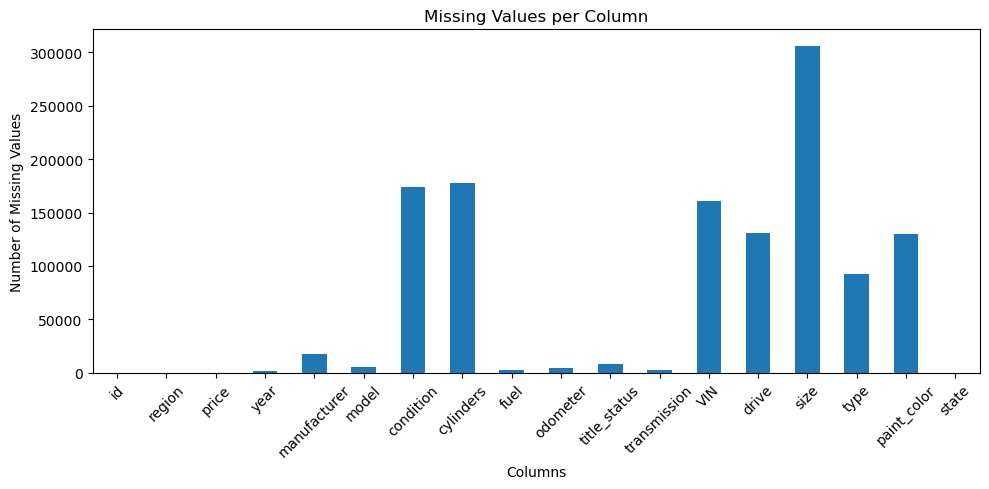

In [2]:
original_df = pd.read_csv('data/vehicles.csv')

display(original_df.head())
display(original_df.describe())
display(original_df.info())

def plot_missing_values(df):
    missing_counts = df.isnull().sum()
    missing_counts.plot(kind='bar', figsize=(10, 5))
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.title('Missing Values per Column')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_missing_values(original_df)

As you can see from above, data provided has some missing values. We will be cleaning this dataset further in the `data preparation` section below

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [3]:
# drop all na's
cleaned_df = original_df.dropna()
# plot_missing_values(cleaned_df)

In [4]:
# price column is most important so checking for bad values in the column
# print(f"Unique prices in asc order: {sorted(cleaned_df['price'].dropna().unique())}")
# print(f"Number of rows with price = 0: {cleaned_df[cleaned_df['price'] == 0].shape[0]}")

In [5]:
# dropping rows where price values are 0
cleaned_df = cleaned_df[cleaned_df['price'] !=0]

In [6]:
# Get all unique values in the model column 
# print("\n".join(f"{model}: {count}" for model, count in cleaned_df['model'].value_counts().items()))

In [7]:
# Feature Engineering for age of the car
cleaned_df['car_age'] = datetime.now().year - cleaned_df['year']
print(cleaned_df[['year', 'car_age']].head())
display(cleaned_df.head())
display(cleaned_df.describe())
display(cleaned_df.info())

       year  car_age
215  2002.0     23.0
219  1995.0     30.0
268  2008.0     17.0
337  2011.0     14.0
338  1972.0     53.0


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,car_age
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al,23.0
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al,30.0
268,7315946365,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al,17.0
337,7315354216,birmingham,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al,14.0
338,7315349921,birmingham,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,1.14023E+13,rwd,full-size,coupe,silver,al,53.0


,id,price,year,odometer,car_age
count,3.249600e+04,32496.000000,32496.000000,3.249600e+04,32496.000000
mean,7.311551e+09,16993.479013,2010.938269,1.089832e+05,14.061731
std,4.294195e+06,13219.394890,7.274987,1.022710e+05,7.274987
min,7.301592e+09,1.000000,1905.000000,0.000000e+00,3.000000
25%,7.308238e+09,7500.000000,2008.000000,6.744975e+04,10.000000
50%,7.312411e+09,13125.500000,2012.000000,1.055840e+05,13.000000
75%,7.315154e+09,23395.000000,2015.000000,1.428455e+05,17.000000
max,7.317099e+09,155000.000000,2022.000000,9.999999e+06,120.000000


<class 'pandas.core.frame.DataFrame'>
Index: 32496 entries, 215 to 426833
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32496 non-null  int64  
 1   region        32496 non-null  object 
 2   price         32496 non-null  int64  
 3   year          32496 non-null  float64
 4   manufacturer  32496 non-null  object 
 5   model         32496 non-null  object 
 6   condition     32496 non-null  object 
 7   cylinders     32496 non-null  object 
 8   fuel          32496 non-null  object 
 9   odometer      32496 non-null  float64
 10  title_status  32496 non-null  object 
 11  transmission  32496 non-null  object 
 12  VIN           32496 non-null  object 
 13  drive         32496 non-null  object 
 14  size          32496 non-null  object 
 15  type          32496 non-null  object 
 16  paint_color   32496 non-null  object 
 17  state         32496 non-null  object 
 18  car_age       32496 non-null

None

In [8]:
# final preparation of categorical and numerical features with what we have including car_age. 
# X = pd.get_dummies(cleaned_df[['car_age', 'odometer', 'manufacturer', 'condition', 'transmission', 'fuel', 'title_status']])
# y = cleaned_df['price']
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# print(f"Training features: {X_train.shape}, Training target: {y_train.shape}")
# print(f"Test features: {X_test.shape}, Test target: {y_test.shape}")

# re-writting this better for features sklearn.pipeline 
features = ['car_age', 'odometer', 'manufacturer', 'condition', 'transmission', 'fuel', 'title_status']# 'type', 'paint_color', 'drive', 'cylinders']
target = 'price'
X = cleaned_df[features]
y = cleaned_df[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [9]:
# Testing out linear regression model
numeric_features = ['car_age', 'odometer']
categorical_features = ['manufacturer', 'condition', 'transmission', 'fuel', 'title_status']#, 'type', 'paint_color', 'drive', 'cylinders']
preprocessor = ColumnTransformer(
    transformers=[
        (
            'num', StandardScaler(), numeric_features
        ),
        (
            'cat', OneHotEncoder(handle_unknown='ignore'), categorical_features
        )
    ]
)
pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

MAE: 6766.008224880225
R2 score: 0.38890572415028735


In [ ]:
# Testing out other models with preprocessor above. 
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1, max_iter=10000),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}
results = {}
best_score = np.inf
best_name = None
best_regressor = None

for name, regressor in models.items():
    pipe = Pipeline(
        [
            ('preprocessor', preprocessor),
            ('regressor', regressor)
        ]
    )
    mae_scores = -cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    mse_scores = -cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    r2_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')
    results[name] = {
        'MAE Mean': np.mean(mae_scores),
        'MAE Std': np.std(mae_scores),
        'MSE Mean': np.mean(mse_scores),
        'MSE Std': np.std(mse_scores),
        'R2 Mean': np.mean(r2_scores),
        'R2 Std': np.std(r2_scores)
    }

    # finding the best model
    if np.mean(mae_scores) < best_score:
        best_score = np.mean(mae_scores)
        best_name = name
        best_regressor = regressor

print(f"best_score: {best_score}, best_name: {best_name}, best_regressor: {regressor}")

best_score: 3364.6413293599535, best_name: Random Forest, best_regressor: GradientBoostingRegressor(random_state=42)


In [11]:
results_df = pd.DataFrame(results).T
results_df['MAE Mean'] = results_df['MAE Mean'].round(2)
results_df['MAE Std'] = results_df['MAE Std'].round(2)
results_df['MSE Mean'] = results_df['MSE Mean'].round(2)
results_df['MSE Std'] = results_df['MSE Std'].round(2)
results_df['R2 Mean'] = results_df['R2 Mean'].round(3)
results_df['R2 Std'] = results_df['R2 Std'].round(3)
print(results_df)

                   MAE Mean  MAE Std      MSE Mean      MSE Std  R2 Mean  \
Linear Regression   6746.29    77.60  1.056740e+08  21633180.52    0.395   
Ridge Regression    6750.16    75.20  1.057316e+08  21767630.55    0.395   
Lasso Regression    6746.60    77.35  1.056729e+08  21638736.41    0.395   
Random Forest       3364.64    67.93  3.936461e+07   2979721.61    0.775   
Gradient Boosting   5491.46    78.43  6.393316e+07   1839142.16    0.634   

                   R2 Std  
Linear Regression   0.123  
Ridge Regression    0.124  
Lasso Regression    0.123  
Random Forest       0.015  
Gradient Boosting   0.013  


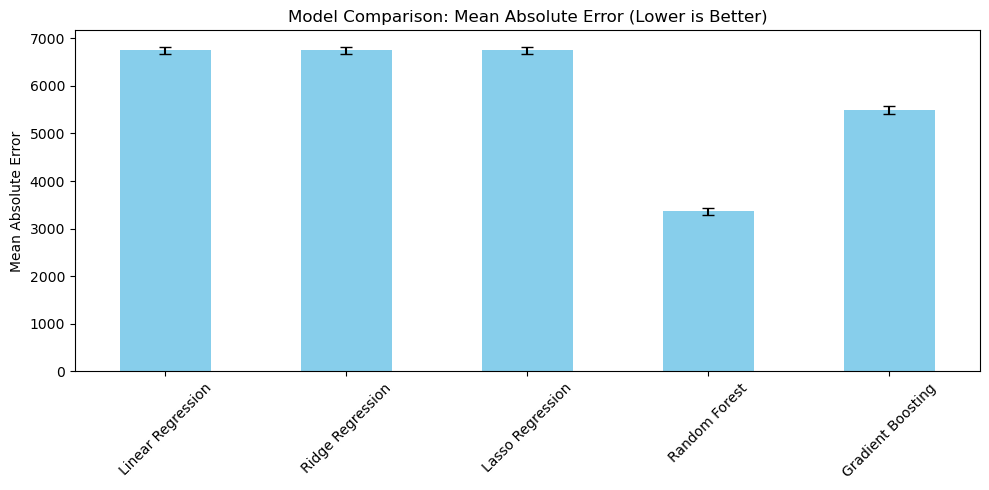

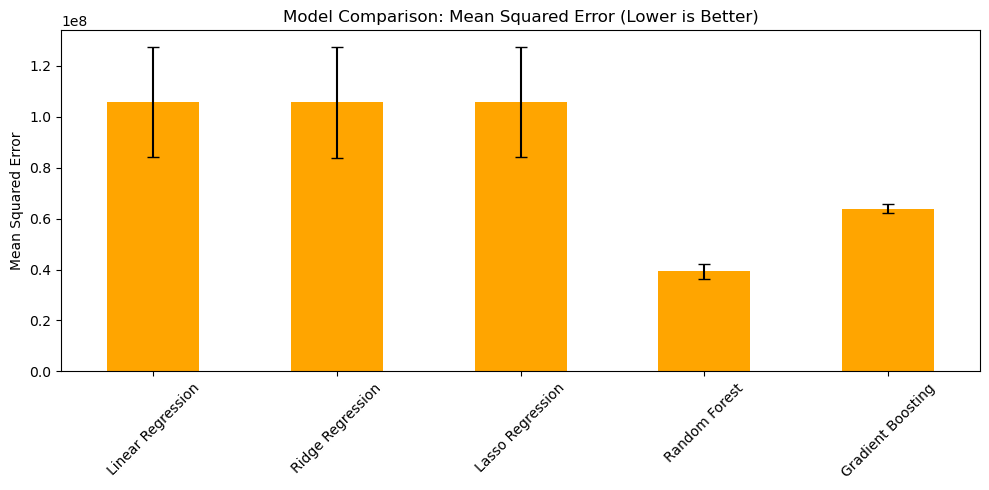

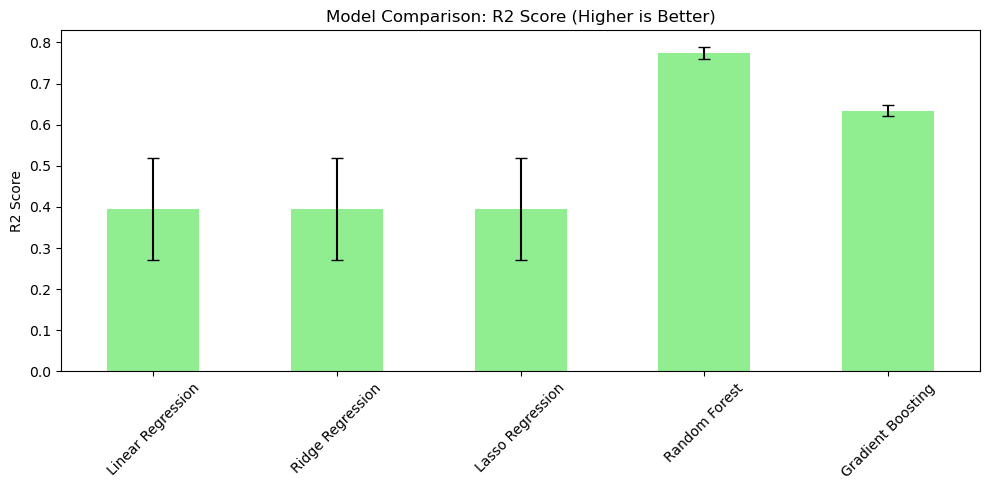

In [12]:
# MAE Bar Plot
plt.figure(figsize=(10, 5))
results_df['MAE Mean'].plot(kind='bar', yerr=results_df['MAE Std'], color='skyblue', capsize=4)
plt.ylabel('Mean Absolute Error')
plt.title('Model Comparison: Mean Absolute Error (Lower is Better)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MSE Bar Plot
plt.figure(figsize=(10, 5))
results_df['MSE Mean'].plot(kind='bar', yerr=results_df['MSE Std'], color='orange', capsize=4)
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison: Mean Squared Error (Lower is Better)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# R2 Bar Plot
plt.figure(figsize=(10, 5))
results_df['R2 Mean'].plot(kind='bar', yerr=results_df['R2 Std'], color='lightgreen', capsize=4)
plt.ylabel('R2 Score')
plt.title('Model Comparison: R2 Score (Higher is Better)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

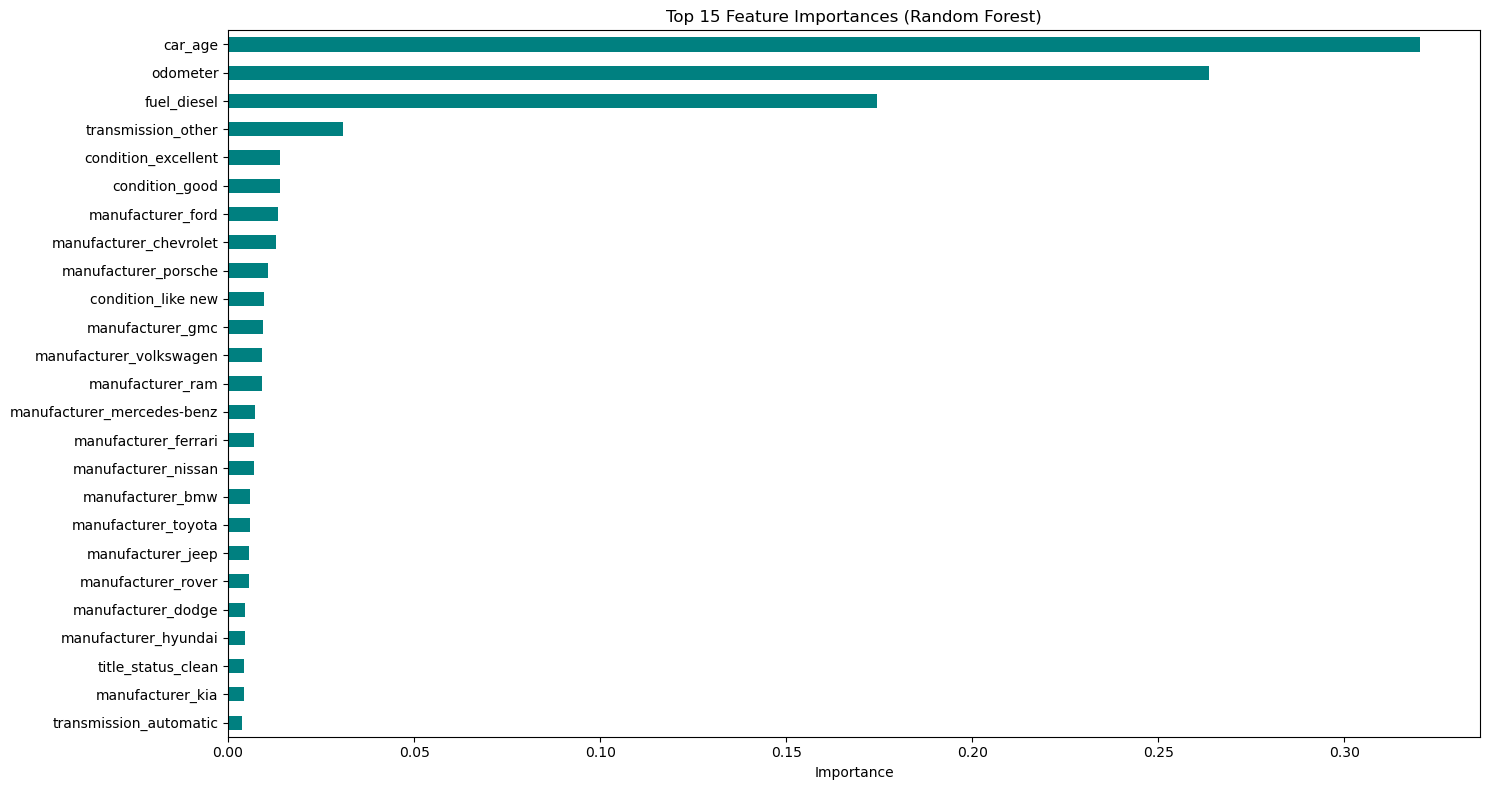

In [13]:
# Fit the randomforestregressor because that provided best number
best_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
best_pipe.fit(X_train, y_train)

cat_names = best_pipe.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_features, cat_names])

importances = best_pipe.named_steps['regressor'].feature_importances_
# print(f"importances: {importances}")
importances_series = pd.Series(importances, index=feature_names)
top_importances = importances_series.sort_values(ascending=False).head(25)

# Plot
plt.figure(figsize=(15, 8))
top_importances.plot(kind='barh', color='teal')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Please see the readme.md file for report/findings. 